In [1]:
import ema as em #2019-17-09
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Problem from Example 4.2 on page 75 of course reader.
domain = em.Domain(3,3)
m1 = domain.material(1.0)
s1 = domain.xsec(1.0, 1.0)

XYZ = [
    [-10.0, -5.77,  0.0],
    [ 10.0, -5.77,  0.0],
    [  0.0, 11.55,  0.0],
    [  0.0, -3.47, 16.0],
    [  3.0,  1.73, 16.0],
    [ -3.0,  1.73, 16.0]]

for i, xyz in enumerate(XYZ):
    domain.node(str(i+1), xyz[0], xyz[1], xyz[2])

a = domain.truss3d('a', domain.nodes[0], domain.nodes[5], m1, s1)
b = domain.truss3d('b', domain.nodes[0], domain.nodes[3], m1, s1)
c = domain.truss3d('c', domain.nodes[1], domain.nodes[3], m1, s1)
d = domain.truss3d('d', domain.nodes[1], domain.nodes[4], m1, s1)
e = domain.truss3d('e', domain.nodes[2], domain.nodes[4], m1, s1)
f = domain.truss3d('f', domain.nodes[2], domain.nodes[5], m1, s1)
g = domain.truss3d('g', domain.nodes[3], domain.nodes[4], m1, s1)
h = domain.truss3d('h', domain.nodes[4], domain.nodes[5], m1, s1)
k = domain.truss3d('k', domain.nodes[3], domain.nodes[5], m1, s1)

# Create reactions
domain.pin(domain.nodes[0])
domain.pin(domain.nodes[1])
domain.pin(domain.nodes[2])

# number DOFs
domain.numDOF()

# Create loading state
state = em.State(domain)

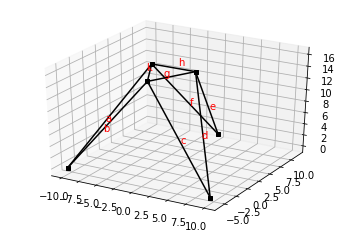

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
em.plotting.plot_structure3d(domain, ax)

In [4]:
B =  sp.Matrix(np.around(em.B_matrix(domain),3))
B

Matrix([
[   0.0,  0.526, -0.526,    0.0,    0.0,    0.0,   -0.5,  0.0,    0.5],
[   0.0,  0.121,  0.121,    0.0,    0.0,    0.0, -0.866,  0.0, -0.866],
[   0.0,  0.842,  0.842,    0.0,    0.0,    0.0,    0.0,  0.0,    0.0],
[   0.0,    0.0,    0.0, -0.368,  0.158,    0.0,    0.5,  1.0,    0.0],
[   0.0,    0.0,    0.0,  0.395, -0.517,    0.0,  0.866,  0.0,    0.0],
[   0.0,    0.0,    0.0,  0.842,  0.842,    0.0,    0.0,  0.0,    0.0],
[ 0.368,    0.0,    0.0,    0.0,    0.0, -0.158,    0.0, -1.0,   -0.5],
[ 0.395,    0.0,    0.0,    0.0,    0.0, -0.517,    0.0,  0.0,  0.866],
[ 0.842,    0.0,    0.0,    0.0,    0.0,  0.842,    0.0,  0.0,    0.0],
[-0.368, -0.526,    0.0,    0.0,    0.0,    0.0,    0.0,  0.0,    0.0],
[-0.395, -0.121,    0.0,    0.0,    0.0,    0.0,    0.0,  0.0,    0.0],
[-0.842, -0.842,    0.0,    0.0,    0.0,    0.0,    0.0,  0.0,    0.0],
[   0.0,    0.0,  0.526,  0.368,    0.0,    0.0,    0.0,  0.0,    0.0],
[   0.0,    0.0, -0.121, -0.395,    0.0,    0.0,    0.0